In [586]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as ss
%matplotlib inline

In [587]:
customers = pd.read_csv("D:\OpenClassrooms\Projet 4\dataset_P4\customers.csv")
products = pd.read_csv("D:\OpenClassrooms\Projet 4\dataset_P4\products.csv")
transactions = pd.read_csv("D:\\OpenClassrooms\\Projet 4\\dataset_P4\\transactions.csv")

# NETTOYAGE

# Jointure sur les données

In [588]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [589]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [590]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [591]:
len(customers.client_id.unique())

8623

In [592]:
len(transactions.client_id.unique())

8602

In [593]:
df_temp = pd.merge(customers, transactions, on = 'client_id', how = 'outer')
df_temp.head()

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942
1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984
2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960
3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860
4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715


In [594]:
df_temp.isnull().sum()

client_id      0
sex            0
birth          0
id_prod       21
date          21
session_id    21
dtype: int64

In [595]:
len(transactions.id_prod.unique())

3266

In [596]:
len(products.id_prod.unique())

3287

In [597]:
df_temp_2 = pd.merge(transactions, products, on = 'id_prod', how = 'outer')

In [598]:
len(df_temp_2.id_prod.unique())

3288

In [599]:
df_temp_2.isnull().sum()

id_prod         0
date           22
session_id     22
client_id      22
price         103
categ         103
dtype: int64

In [600]:
p = set(df_temp_2.id_prod.unique())
r = set(products.id_prod.unique())
r.symmetric_difference(p)

{'0_2245'}

In [601]:
products[products.id_prod == '0_2245']

,id_prod,price,categ


In [602]:
transactions[transactions.id_prod == '0_2245'].head()

,id_prod,date,session_id,client_id
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580


In [603]:
data = pd.merge(df_temp, products, on = 'id_prod', how = 'outer')
data.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967.0,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0.0
1,c_4389,m,1984.0,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0.0
2,c_5019,f,1977.0,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0.0
3,c_7049,f,1987.0,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0.0
4,c_5110,f,1982.0,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0.0


In [604]:
data[data.id_prod == '0_2245'].head()

,client_id,sex,birth,id_prod,date,session_id,price,categ
266960,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN
266961,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN
266962,c_1403,f,1978.0,0_2245,2022-02-15 14:26:50.187952,s_165575,NaN,NaN
266963,c_3065,f,1977.0,0_2245,2022-01-26 13:34:33.440366,s_155484,NaN,NaN
266964,c_7102,m,1983.0,0_2245,2021-04-25 19:58:42.716401,s_25704,NaN,NaN


In [605]:
# Passer en df, ou trouver une différence symétrique sur les array

# -----------------------------------------------

# Suppression des doublons et recherche des NaN

In [606]:
data.drop_duplicates(inplace=True)

In [607]:
data.isnull().sum()

client_id      22
sex            22
birth          22
id_prod        21
date           43
session_id     43
price         124
categ         124
dtype: int64

In [608]:
data[data.id_prod=='T_0']

,client_id,sex,birth,id_prod,date,session_id,price,categ
336234,ct_0,f,2001.0,T_0,test_2021-03-01 02:30:02.237441,s_0,-1.0,0.0
336235,ct_0,f,2001.0,T_0,test_2021-03-01 02:30:02.237443,s_0,-1.0,0.0
336236,ct_0,f,2001.0,T_0,test_2021-03-01 02:30:02.237442,s_0,-1.0,0.0
336237,ct_0,f,2001.0,T_0,test_2021-03-01 02:30:02.237426,s_0,-1.0,0.0
336238,ct_0,f,2001.0,T_0,test_2021-03-01 02:30:02.237434,s_0,-1.0,0.0
336239,ct_0,f,2001.0,T_0,test_2021-03-01 02:30:02.237438,s_0,-1.0,0.0
336241,ct_0,f,2001.0,T_0,test_2021-03-01 02:30:02.237437,s_0,-1.0,0.0
336242,ct_0,f,2001.0,T_0,test_2021-03-01 02:30:02.237450,s_0,-1.0,0.0
336243,ct_0,f,2001.0,T_0,test_2021-03-01 02:30:02.237429,s_0,-1.0,0.0
336244,ct_0,f,2001.0,T_0,test_2021-03-01 02:30:02.237435,s_0,-1.0,0.0


In [609]:
# Produit T_0 pour deux clients factices différents, de sexes différents

# Impact des prix NaN sur le CA

In [610]:
data[data.price.isnull()].head()

,client_id,sex,birth,id_prod,date,session_id,price,categ
266960,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN
266961,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN
266962,c_1403,f,1978.0,0_2245,2022-02-15 14:26:50.187952,s_165575,NaN,NaN
266963,c_3065,f,1977.0,0_2245,2022-01-26 13:34:33.440366,s_155484,NaN,NaN
266964,c_7102,m,1983.0,0_2245,2021-04-25 19:58:42.716401,s_25704,NaN,NaN


In [611]:
data[data.price.isnull()].id_prod.unique()

array(['0_2245', nan], dtype=object)

In [612]:
# Prix et categ NaN pour le seul id_prod 0_2245 ou NaN

In [613]:
# Imputation par la moyenne des prix manquants 

In [614]:
data_temp = data

In [615]:
ca_avant = data_temp.price.sum()
ca_avant

5797302.04

In [616]:
moyenne_prix = data_temp.price.mean()
moyenne_prix

17.21243209065471

In [617]:
# CA sans suppression des NaN dans price

In [618]:
data_temp.price.fillna(value=moyenne_prix, inplace=True)

In [619]:
ca_apres = data_temp.price.sum()
ca_apres

5799436.381579242

In [620]:
pourcent_evo = ((ca_apres - ca_avant) / ca_avant) * 100
pourcent_evo

0.03681611833427396

In [621]:
# 0,03% --> Négligeable, on peut donc supprimer ces prix manquants

In [622]:
data.dropna(subset=['price', 'categ'], inplace=True)

In [623]:
data.isnull().sum()

client_id     22
sex           22
birth         22
id_prod        0
date          22
session_id    22
price          0
categ          0
dtype: int64

# ---------------------------------------

# Impact des 22 transactions avec NaN sur le CA

In [624]:
data[data.sex.isnull()].price.sum() / ca_avant * 100 

0.013769681042873521

In [625]:
# 0,01% du CA, négligeable. On supprime 

In [626]:
data.dropna(how='any', inplace=True)

In [627]:
data.isnull().sum()

client_id     0
sex           0
birth         0
id_prod       0
date          0
session_id    0
price         0
categ         0
dtype: int64

In [628]:
data.categ = data.categ.apply(lambda x : int(x))

In [629]:
data.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967.0,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0
1,c_4389,m,1984.0,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0
2,c_5019,f,1977.0,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0
3,c_7049,f,1987.0,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0
4,c_5110,f,1982.0,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0


# --------------------------------------

# Valeurs aberrantes

In [630]:
data.price.sort_values().unique()

array([ -1.  ,   0.62,   0.66, ..., 247.22, 254.44, 300.  ])

In [631]:
# Prix négatifs. On supprime

In [632]:
data = data[data.price >= 0]

In [633]:
# Dates "tests" qui ont été supprimées avec la restriction sur les prix positifs (liées aux id_prod T_0)

In [634]:
data.date = pd.to_datetime(data.date)

In [635]:
data.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967.0,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0
1,c_4389,m,1984.0,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0
2,c_5019,f,1977.0,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0
3,c_7049,f,1987.0,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0
4,c_5110,f,1982.0,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0


In [636]:
data.categ = data.categ.apply(lambda x: int(x))
data.birth = data.birth.apply(lambda x: int(x))

In [637]:
data.categ.unique()

array([0, 1, 2], dtype=int64)

In [638]:
# OK

In [639]:
data.birth.sort_values().unique()

array([1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004],
      dtype=int64)

In [640]:
data['age'] = 2022 - data.birth 

C:\Users\adric\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [641]:
data.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40


In [642]:
# OK (peut-être restriction sur les majeurs uniquement (année 2004 à enlever))

In [643]:
# 1 client --> au moins 1 session_id 
# 1 session_id --> 1 client
# 1 client --> 1 sexe, 1 âge
# 1 id_prod --> 1 categ

In [644]:
data.groupby('client_id').session_id.value_counts().head(40)

client_id  session_id
c_1        s_114737      5
           s_120172      2
           s_105105      1
           s_134971      1
           s_136532      1
           s_139610      1
           s_158128      1
           s_47346       1
           s_65433       1
           s_66947       1
           s_67467       1
           s_67769       1
           s_79696       1
           s_85977       1
           s_86739       1
c_10       s_17374       5
           s_131932      4
           s_15668       2
           s_65973       2
           s_77648       2
           s_81194       2
           s_93508       2
           s_117253      1
           s_120724      1
           s_134165      1
           s_55109       1
           s_62189       1
           s_87002       1
           s_89846       1
           s_9259        1
           s_97381       1
c_100      s_73929       3
           s_53051       2
           s_23060       1
c_1000     s_161640      6
           s_5748        4
      

In [645]:
len(data.groupby('client_id').session_id.value_counts()) >= len(data.client_id.unique())

True

In [646]:
# On a bien au moins 1 session_id par client_id

In [647]:
len(data.groupby('session_id').client_id.value_counts()) == len(data.session_id.unique())

True

In [648]:
# On a bien 1 sexe par client_id 

In [649]:
len(data.groupby('client_id').sex.value_counts()) == len(data.client_id.unique())

True

In [650]:
# 1 client = 1 age

In [651]:
len(data.groupby('client_id').birth.value_counts()) == len(data.client_id.unique())

True

In [652]:
# Suppression des clients atypiques 
corr = data[(data.client_id != 'c_1609') & (data.client_id != 'c_6714') & (data.client_id != 'c_4958') & (data.client_id != 'c_3454') & (data.birth != 2004)]

# ANALYSE

## Indicateurs de tendance centrale

In [653]:
# Combien de clients ? 
data.client_id.unique().shape
# 8600 clients différents

(8600,)

In [654]:
# Combien de ventes durant l'année ?
data.shape[0]
# 336713

336713

In [655]:
# Chiffre d'affaires sur l'année 
ca_avant

5797302.04

In [656]:
# Quel est la moyenne d'âge des personnes ?
moyenne_annee = data.date.dt.year.mean() - data.birth.mean()
round(moyenne_annee, 2)
# Autour de 43 ans

43.35

In [657]:
data.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40


# Age des clients

In [658]:
mean_birth = round(customers.birth.mean())
mean_birth

1978

In [659]:
customers['age'] = 2022 - customers.birth
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


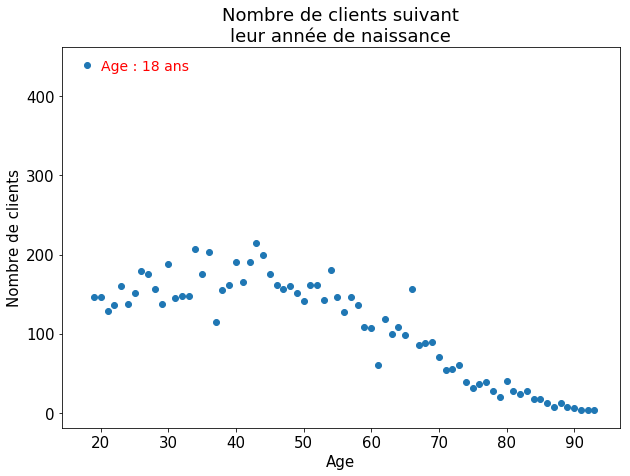

In [660]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,7))
plt.scatter(customers.age.value_counts().index, customers.age.value_counts())
plt.xlabel('Age')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients suivant\nleur année de naissance', fontsize=18)
plt.text(20, 433, 'Age : 18 ans', color = 'red', fontsize=14, rotation=0)

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Distribution âges")

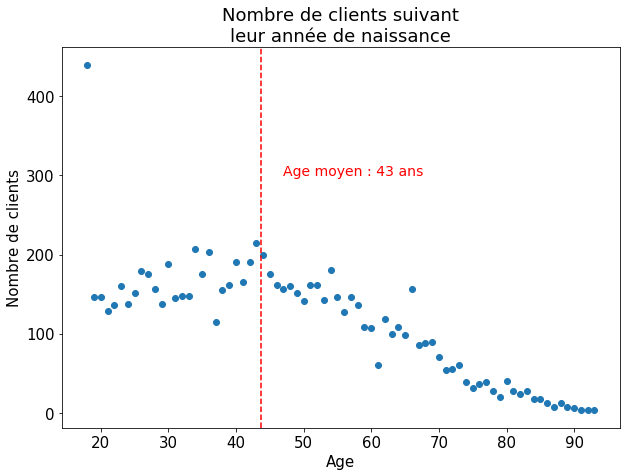

In [661]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,7))
plt.scatter(customers.age.value_counts().index, customers.age.value_counts())
plt.axvline(customers.age.mean(), color='r', linestyle='--')
plt.xlabel('Age')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients suivant\nleur année de naissance', fontsize=18)
plt.text(47, 300, 'Age moyen : 43 ans', color = 'red', fontsize=14, rotation=0)

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Distribution âges")

Text(0.5, 1.0, '')

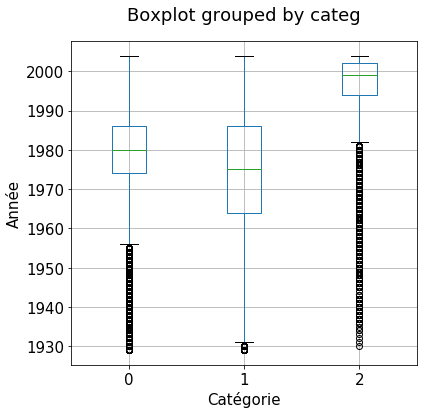

In [662]:
data.boxplot(column = 'birth', by = 'categ', figsize=(6,6))
plt.xlabel('Catégorie')
plt.ylabel('Année')
plt.title('')

In [663]:
# On remarque que les plus jeunes sont plus intéréssés par les produits de catégorie 2, tandis que les plus âgés le sont plus 
# pour des produits de catégories 0 ou 1

In [664]:
# Quel est la proportion d'hommes et de femmes ?
sex = data.sex.value_counts()
ratio_h_f = sex / len(data)
ratio_h_f * 100
# 50-50 

m    50.249916
f    49.750084
Name: sex, dtype: float64

# Etude de la distribution des prix par catégorie

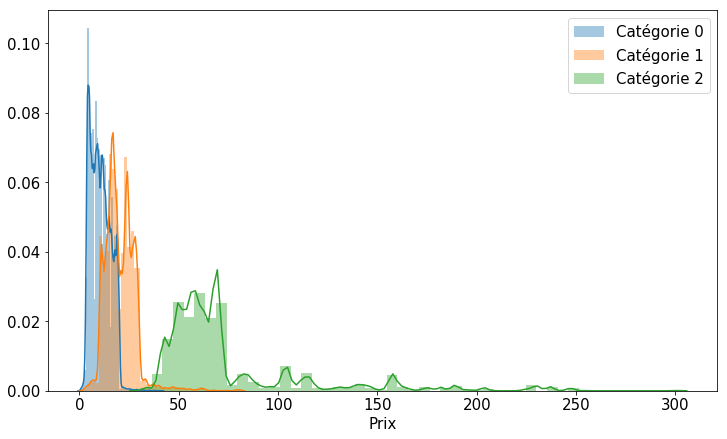

In [665]:
prix_0 = data[data.categ == 0].price
prix_1 = data[data.categ == 1].price
prix_2 = data[data.categ == 2].price

plt.figure(figsize=(12,7))
sns.distplot(prix_0, label='Catégorie 0')
sns.distplot(prix_1, label='Catégorie 1')
sns.distplot(prix_2, label='Catégorie 2')
plt.xlabel('Prix')
plt.legend()

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Distribution prix par catégorie")

In [666]:
centrale_dispersion = pd.DataFrame({'Catégorie': [0, 1, 2],
'Min': [prix_0.min(), prix_1.min(), prix_2.min()],
'Max': [prix_0.max(), prix_1.max(), prix_2.max()],
'Mean': [prix_0.mean(), prix_1.mean(), prix_2.mean()],
'Var': [prix_0.var(), prix_1.var(), prix_2.var()],
'Std': [prix_0.std(), prix_1.std(), prix_2.std()],
'Kurtosis': [prix_0.kurtosis(), prix_1.kurtosis(), prix_2.kurtosis()],
'Skewness': [prix_0.skew(), prix_1.skew(), prix_2.skew()]})

centrale_dispersion

,Catégorie,Min,Max,Mean,Var,Std,Kurtosis,Skewness
0,0,0.62,40.99,10.646828,24.305194,4.930030,-0.373708,0.426518
1,1,2.00,80.99,20.480106,57.289096,7.568956,8.154193,1.727288
2,2,30.99,300.00,75.174949,1527.246308,39.079999,5.537461,2.315631


Text(0.5, 1.0, '')

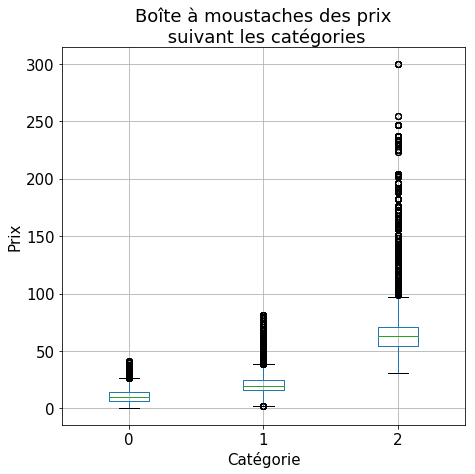

In [667]:
data.boxplot(column = 'price', by = 'categ', figsize=(7,7))
plt.xlabel('Catégorie')
plt.ylabel('Prix')
plt.suptitle('Boîte à moustaches des prix\n suivant les catégories')
plt.title('')

In [668]:
# Les produits semblent coûter plus cher plus on avance dans les catégories

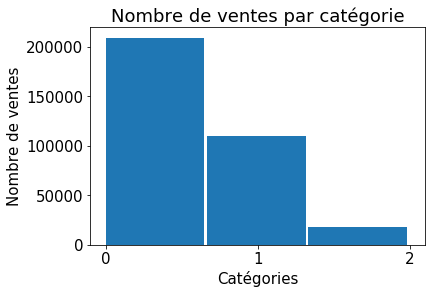

In [669]:
# Les catégories

data.categ.value_counts()
plt.hist(data['categ'], bins=3, width = 0.65)
plt.xlabel('Catégories')
plt.ylabel('Nombre de ventes')
plt.xticks([0, 1, 2])
plt.title('Nombre de ventes par catégorie')

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Nombre de ventes par catégorie")

In [670]:
# Logiquement, il y a plus d'achats à bas prix 

# Etude des ventes dans le temps 

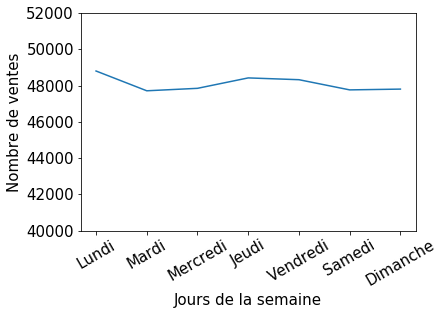

In [671]:
weekday = data.date.dt.weekday.value_counts().sort_index()
week_day = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
plt.plot(weekday)
plt.xlabel('Jours de la semaine')
plt.xticks(list(weekday.index), week_day, rotation=30)
plt.ylabel('Nombre de ventes')
plt.ylim(40000, 52000)

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Nombre de ventes par jour de la semaine")

In [672]:
(weekday.max() / weekday.min()) * 100

102.2884925707819

In [673]:
# Peu de variations en fonction du jour (sur un an) (2% de différence)

In [674]:
# Aucun jour d'affluence particulier

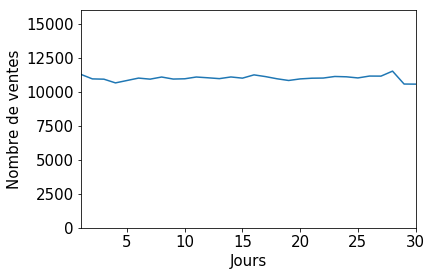

In [675]:
day = data.date.dt.day.value_counts().sort_index()
day = day.drop(31)
plt.plot(day)
plt.xlim(1, 30)
plt.ylim(0, 16000)
plt.xlabel('Jours')
plt.ylabel('Nombre de ventes')

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Nombre de ventes par jour du mois")

In [676]:
data.date

0        2021-03-22 14:29:25.189266
1        2021-07-09 11:16:18.579726
2        2022-01-15 00:01:53.456196
3        2021-03-04 14:01:38.698752
4        2021-09-05 11:48:41.065009
5        2021-06-14 10:49:01.405461
6        2021-05-10 03:17:53.790835
7        2021-12-18 19:56:53.885628
8        2021-11-16 08:48:19.743621
9        2021-03-22 04:35:46.212904
10       2021-08-11 01:12:39.670567
11       2021-09-21 20:39:54.819698
12       2021-06-27 06:16:35.816134
13       2021-07-29 22:29:16.683303
14       2021-03-04 22:01:47.246169
15       2021-10-12 23:51:43.817288
16       2021-09-13 00:22:44.674437
17       2021-09-18 15:31:45.065042
18       2022-01-03 09:25:28.667932
19       2021-12-12 14:19:43.827078
20       2021-08-30 21:26:55.814032
21       2021-06-03 20:46:10.617742
22       2021-08-30 20:54:01.023014
23       2021-10-11 18:21:35.483258
24       2021-06-28 11:41:30.648694
25       2021-04-26 05:45:50.768781
26       2021-06-17 10:34:50.747885
27       2021-05-21 01:57:18

In [677]:
# On choisit de supprimer le jour 31, qui n'est spécifique qu'à quelques mois dans l'année

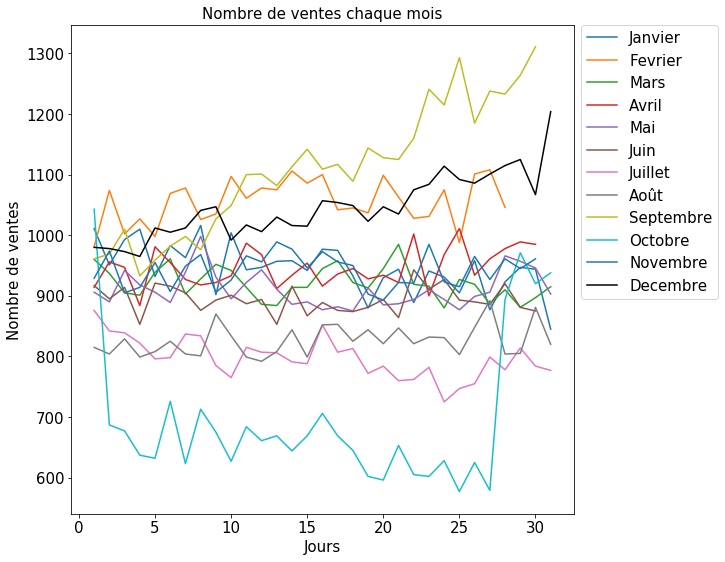

In [678]:
plt.figure(figsize=(9,9))
plt.plot(data[data.date.dt.month == 1].date.dt.day.value_counts().sort_index(), label='Janvier')
plt.plot(data[data.date.dt.month == 2].date.dt.day.value_counts().sort_index(), label='Fevrier')
plt.plot(data[data.date.dt.month == 3].date.dt.day.value_counts().sort_index(), label='Mars')
plt.plot(data[data.date.dt.month == 4].date.dt.day.value_counts().sort_index(), label='Avril')
plt.plot(data[data.date.dt.month == 5].date.dt.day.value_counts().sort_index(), label='Mai')
plt.plot(data[data.date.dt.month == 6].date.dt.day.value_counts().sort_index(), label='Juin')
plt.plot(data[data.date.dt.month == 7].date.dt.day.value_counts().sort_index(), label='Juillet')
plt.plot(data[data.date.dt.month == 8].date.dt.day.value_counts().sort_index(), label='Août')
plt.plot(data[data.date.dt.month == 9].date.dt.day.value_counts().sort_index(), label='Septembre')
plt.plot(data[data.date.dt.month == 10].date.dt.day.value_counts().sort_index(), label='Octobre')
plt.plot(data[data.date.dt.month == 11].date.dt.day.value_counts().sort_index(), label='Novembre')
plt.plot(data[data.date.dt.month == 12].date.dt.day.value_counts().sort_index(), label='Decembre', color='black')
plt.xlabel('Jours', fontsize=15)
plt.ylabel('Nombre de ventes', fontsize=15)
plt.legend(bbox_to_anchor=(1, 1.015), fontsize=15)
plt.title('Nombre de ventes chaque mois', fontsize=15)

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Nombre de ventes par mois")

In [679]:
# Septembre (mois le plus rentable) --> Octobre (mois le moins rentable)
# Problème en Octobre

In [680]:
jan, fev, mars, avr, mai, juin, juil, aout, sept, octo, nov, dec = [data[data.date.dt.month == i] for i in range(1, 13)]

In [681]:
data.groupby(data.date.dt.month).sum()

,birth,price,categ,age
date,,,,
1,57956631,522955.31,15300,1310211
2,58458932,532740.88,14129,1303300
3,56485184,479312.03,11764,1261114
4,56180727,472980.72,10581,1246095
5,55851818,489367.95,11413,1243396
6,53034239,481257.94,12602,1179625
7,48886368,480898.66,13125,1081296
8,50665130,479305.19,11850,1118290
9,65754257,502771.28,11016,1485331


In [682]:
# Remarque : faible somme sur les âges et catégories

In [683]:
# Faire l'histogramme stacked (x = temps, y = prix, coloré par categ)

In [684]:
categ_by_month_temp = data.groupby(data.date.dt.month).categ.value_counts()
categ_by_month = categ_by_month_temp.unstack()

In [685]:
categ_by_month_temp.head()

date  categ
1     0        15381
      1        12560
      2         1370
2     0        17262
      1        10459
Name: categ, dtype: int64

In [686]:
categ_0, categ_1, categ_2 = [categ_by_month[i] for i in range(3)]

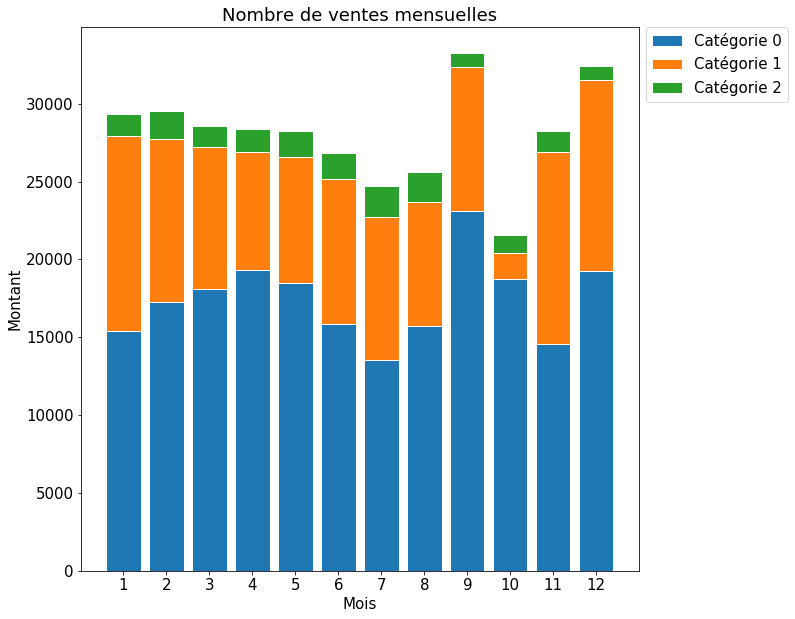

In [687]:
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.figure(figsize = (10,10))
bars = np.add(categ_0, categ_1).tolist()
barwidth = 0.8
p1 = plt.bar(month, categ_0, edgecolor='white', width=barwidth, label='Catégorie 0')
p2 = plt.bar(month, categ_1, bottom = categ_0, edgecolor='white',width=barwidth, label='Catégorie 1')
p3 = plt.bar(month, categ_2, bottom = bars, edgecolor='white', width=barwidth, label='Catégorie 2')
plt.xticks(month)
plt.xlabel('Mois')
plt.ylabel('Montant')
plt.legend(bbox_to_anchor=(1, 1.015))
plt.title('Nombre de ventes mensuelles')
plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Ventes mensuelles")

In [688]:
mean_end_year = categ_by_month.loc[:][1][[9, 11, 12]].mean()
categ_by_month.loc[:][1][10] = mean_end_year
categ_by_month

categ,0,1,2
date,,,
1,15381,12560,1370
2,17262,10459,1835
3,18110,9134,1315
4,19321,7579,1501
5,18477,8107,1653
6,15879,9264,1669
7,13565,9169,1978
8,15708,7954,1948
9,23112,9268,874


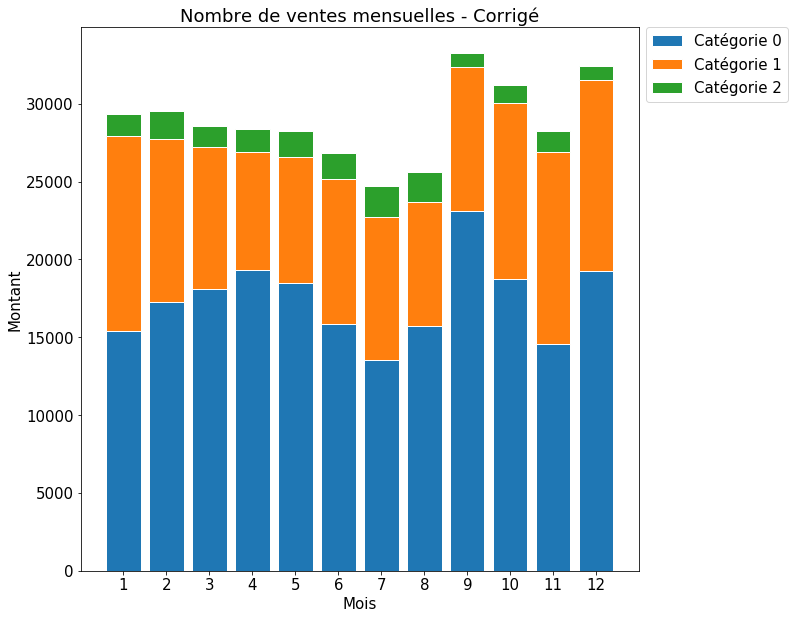

In [689]:
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.figure(figsize = (10,10))
bars = np.add(categ_0, categ_1).tolist()
barwidth = 0.8
p1 = plt.bar(month, categ_0, edgecolor='white', width=barwidth, label='Catégorie 0')
p2 = plt.bar(month, categ_1, bottom = categ_0, edgecolor='white',width=barwidth, label='Catégorie 1')
p3 = plt.bar(month, categ_2, bottom = bars, edgecolor='white', width=barwidth, label='Catégorie 2')
plt.xticks(month)
plt.xlabel('Mois')
plt.ylabel('Montant')
plt.legend(bbox_to_anchor=(1, 1.015))
plt.title('Nombre de ventes mensuelles - Corrigé')
plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Ventes mensuelles corrigées")

In [690]:
# les ventes de la catégorie 1 du mois d'octobre ont peut-être été "oubliées" informatiquement 

In [691]:
data[(data.date.dt.month == 9) & (data.categ == 0)].birth.describe()

count    23112.000000
mean      1978.032148
std         11.061034
min       1929.000000
25%       1974.000000
50%       1980.000000
75%       1986.000000
max       2004.000000
Name: birth, dtype: float64

In [692]:
# Pas forcément d'étudiants 

# Etude du comportement par sexe

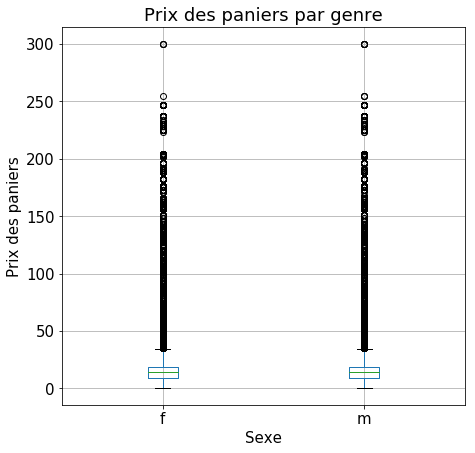

In [693]:
data.boxplot(column = 'price', by = 'sex', figsize=(7,7))
plt.xlabel('Sexe')
plt.ylabel('Prix des paniers')
plt.title('Prix des paniers par genre')
plt.suptitle('')
plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Prix des paniers par genre")

In [694]:
# Prix plus élevés en montant dans les catégories
# Hypothèse : Categ 0 --> livres (romans), ebooks ; Categ 1 --> livres scolaires (soutien scolaire, etc) (plus chers) ; --> 
# Categ 3 : DVD, Blu-ray, etc

In [695]:
data.groupby('sex').describe()

age                                                         birth  \
        count       mean        std   min   25%   50%   75%   max     count   
sex                                                                           
f    167515.0  44.737301  13.847813  18.0  35.0  43.0  53.0  93.0  167515.0   
m    169198.0  43.621142  13.173003  18.0  35.0  42.0  50.0  93.0  169198.0   

                  ...   categ          price                              \
            mean  ...     75%  max     count       mean        std   min   
sex               ...                                                      
f    1977.262699  ...     1.0  2.0  167515.0  17.067855  17.362773  0.62   
m    1978.378858  ...     1.0  2.0  169198.0  17.361056  18.329061  0.62   

                                
      25%    50%    75%    max  
sex                             
f    8.61  13.94  18.99  300.0  
m    8.58  13.89  18.99  300.0  

[2 rows x 32 columns]

In [696]:
# Même comportement entre hommes et femmes (même moyenne, même médiane, même p25, même p75)

In [697]:
# Analyser par categ : prix, profil des personnes (bivarié)

# Recherche de clients atypiques

In [698]:
data[data.categ == 0].client_id.value_counts().head(10)

c_1609    10286
c_6714     2638
c_3454     1328
c_7959      157
c_3725      156
c_2140      153
c_8026      152
c_5922      151
c_2595      151
c_8556      149
Name: client_id, dtype: int64

In [699]:
data[data.client_id == 'c_1609'].price.sum()

162007.34

In [700]:
data[data.categ == 1].client_id.value_counts().head(10)

c_1609    2568
c_3454    1937
c_6714    1695
c_4958     910
c_7198      62
c_3672      60
c_1279      57
c_8526      57
c_2652      57
c_8201      57
Name: client_id, dtype: int64

In [701]:
data[data.categ == 2].client_id.value_counts().head(10)

c_4958    1649
c_6714     138
c_2899      27
c_4256      26
c_2212      25
c_4669      25
c_2264      25
c_7390      24
c_4683      24
c_1805      24
Name: client_id, dtype: int64

In [702]:
data.groupby('client_id').price.sum().sort_values(ascending=False).head()

client_id
c_1609    162007.34
c_4958    144257.21
c_6714     73197.34
c_3454     54442.92
c_7959      2564.25
Name: price, dtype: float64

In [703]:
# Présence de 4 clients atypiques : c_1609, c_4958, c_3454, c_6714

In [704]:
# On prend les 430 clients les plus fidèles (5% de l'échantillon)
client_fideles = data.client_id.value_counts().head(430)

In [705]:
sex = []
birth = []
for k in range(len(client_fideles)):
    sex.append(data[data.client_id == client_fideles.index[k]].sex.unique())
    birth.append(data[data.client_id == client_fideles.index[k]].birth.unique())

In [706]:
print(sex.count(['f']), ' femmes et', sex.count(['m']), ' hommes')

216  femmes et 214  hommes


In [707]:
np.mean(birth)

1981.9976744186047

In [708]:
np.median(birth)

1982.0

In [709]:
# Qui achète le plus cher ? 

In [710]:
data.price.quantile([0.25, 0.5, 0.75])

0.25     8.61
0.50    13.90
0.75    18.99
Name: price, dtype: float64

In [711]:
inter_quartile = data.price.quantile(0.75) - data.price.quantile(0.25)
inter_quartile

10.379999999999999

In [712]:
gros_acheteurs = data[data.price > data.price.quantile(0.75) + 1.5*inter_quartile]

In [713]:
gros_acheteurs.birth.mean()

1993.123928903687

In [714]:
# les gros acheteurs sont nés autour des années 1978

In [715]:
gros_acheteurs.sex.value_counts() / gros_acheteurs.sex.shape[0]

m    0.522695
f    0.477305
Name: sex, dtype: float64

In [716]:
# Un peu plus de gros acheteurs hommes que femmes

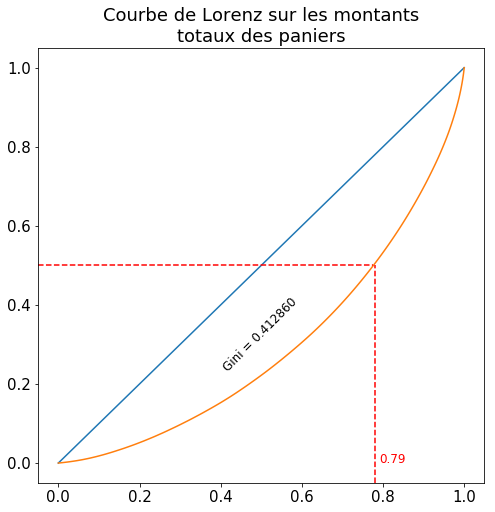

In [717]:
lorenz = np.cumsum(np.sort(corr.groupby('session_id').price.sum())) / corr.groupby('session_id').price.sum().sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1])
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.axhline(y=0.5, xmax=0.75, color='r', linestyle='--')
plt.axvline(x=0.78, ymax=0.5, color='r', linestyle='--')
plt.text(0.4, 0.4, 'Gini = %f' % (gini), color = 'black', fontsize=12, rotation=45)
plt.text(0.79, 0, '0.79', color = 'red', fontsize=12)
plt.title('Courbe de Lorenz sur les montants\ntotaux des paniers')

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Courbe de Lorenz montant totaux des paniers")

# Bivarié

# Paniers 

In [718]:
X = "age" # qualitative
Y = "price" # quantitative

sous_echantillon = prix_age_df # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('Eta² : ', round(eta_squared(sous_echantillon[X],sous_echantillon[Y]), 3))

Eta² :  0.097


In [719]:
X0 = "age" # qualitative
Y0 = "price" # quantitative

sous_echantillon_0 = prix_age_df_0 # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('Eta² : ', round(eta_squared(sous_echantillon_0[X0],sous_echantillon_0[Y0]), 3))

Eta² :  0.383


In [720]:
X1 = "age" # qualitative
Y1 = "price" # quantitative

sous_echantillon_1 = prix_age_df_1 # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('Eta² : ', round(eta_squared(sous_echantillon_1[X1],sous_echantillon_1[Y1]), 3))

Eta² :  0.128


In [721]:
X2 = "age" # qualitative
Y2 = "price" # quantitative

sous_echantillon_2 = prix_age_df_2 # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('Eta² : ', round(eta_squared(sous_echantillon_2[X2],sous_echantillon_2[Y2]), 3))

Eta² :  0.33


In [722]:
# Influence modérée de l'année de naissance sur le prix 
# On va chercher à discrétiser le colonne birth afin de chercher s'il n'y a pas de corrélation sous-jacente

In [723]:
prix_age = corr.groupby(['client_id', 'age'])['price'].sum()
prix_age_0 = corr[corr.categ == 0].groupby(['client_id', 'age'])['price'].sum()
prix_age_1 = corr[corr.categ == 1].groupby(['client_id', 'age'])['price'].sum()
prix_age_2 = corr[corr.categ == 2].groupby(['client_id', 'age'])['price'].sum()

In [724]:
prix_age_df = prix_age.reset_index()
prix_age_df_0 = prix_age_0.reset_index()
prix_age_df_1 = prix_age_1.reset_index()
prix_age_df_2 = prix_age_2.reset_index()

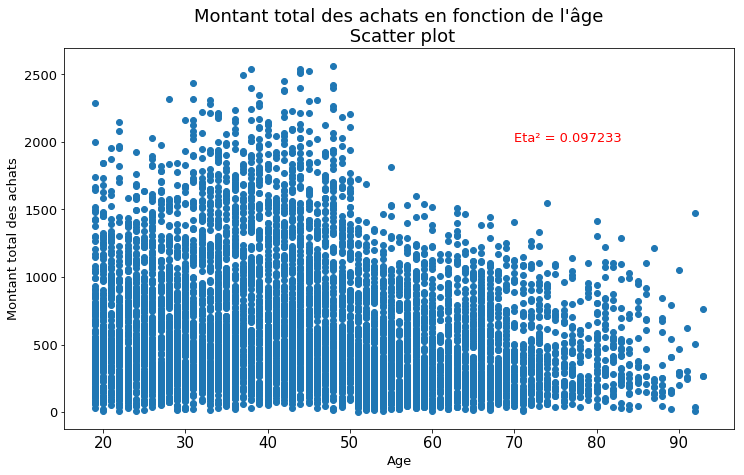

In [725]:
plt.figure(figsize = (12, 7))
plt.scatter(prix_age_df.age, prix_age_df.price)

plt.yticks(size=13)
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Montant total des achats', fontsize = 13)

plt.title("Montant total des achats en fonction de l'âge\n Scatter plot")

plt.text(70, 2000, 'Eta² = %f' % (eta_squared(sous_echantillon[X],sous_echantillon[Y])), color = 'r', fontsize=13, rotation=0)

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Montant total des achats par âge")

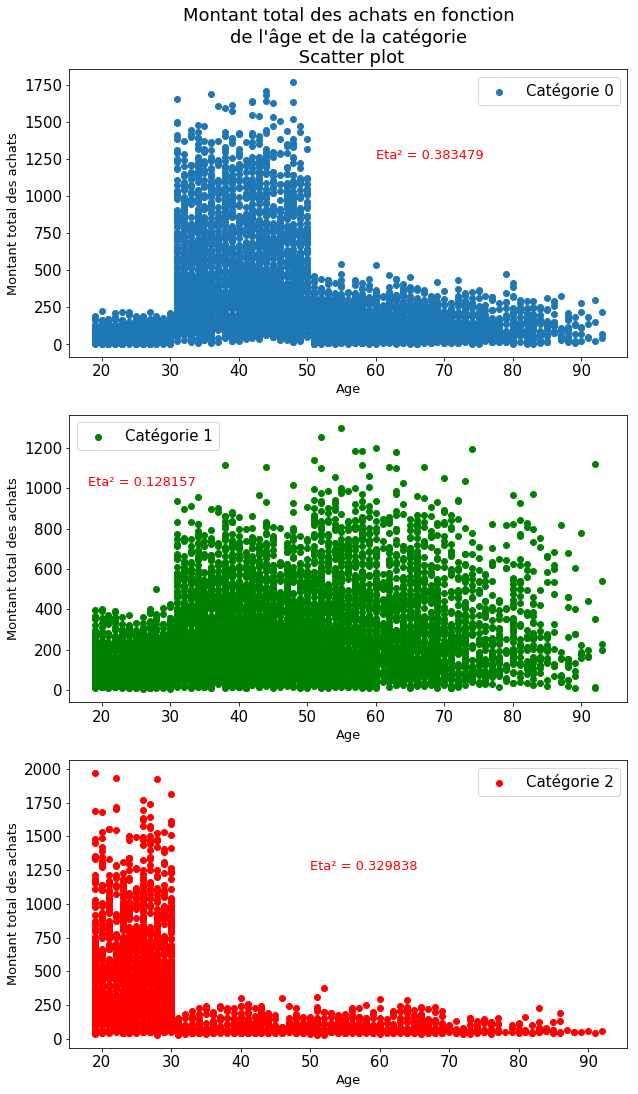

In [727]:
plt.figure(figsize=(10,18))

plt.subplot(311)
plt.scatter(prix_age_df_0.age, prix_age_df_0.price, label = 'Catégorie 0')
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Montant total des achats', fontsize = 13)
plt.legend(loc = 1)
plt.text(60, 1250, 'Eta² = %f' % (eta_squared(sous_echantillon_0[X0],sous_echantillon_0[Y0])), color = 'r', fontsize=13, rotation=0)

plt.title("Montant total des achats en fonction\nde l'âge et de la catégorie\n Scatter plot")

plt.subplot(312)
plt.scatter(prix_age_df_1.age, prix_age_df_1.price, color = 'g', label = 'Catégorie 1')
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Montant total des achats', fontsize = 13)
plt.text(18, 1010, 'Eta² = %f' % (eta_squared(sous_echantillon_1[X1],sous_echantillon_1[Y1])), color = 'r', fontsize=13, rotation=0)
plt.legend(loc = 2)

plt.subplot(313)
plt.scatter(prix_age_df_2.age, prix_age_df_2.price, color = 'r', label = 'Catégorie 2')
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Montant total des achats', fontsize = 13)
plt.text(50, 1250, 'Eta² = %f' % (eta_squared(sous_echantillon_2[X2],sous_echantillon_2[Y2])), color = 'r', fontsize=13, rotation=0)
plt.legend(loc = 1)

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Montant total des achats par âge et par catégorie")

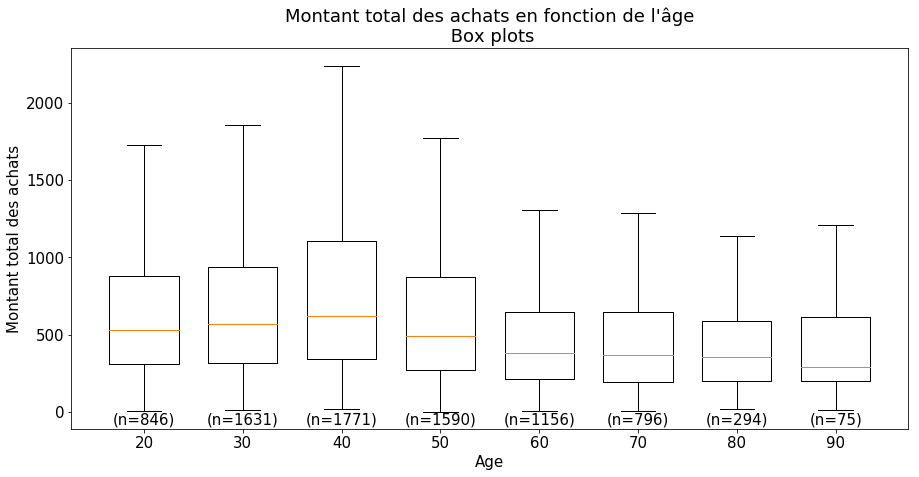

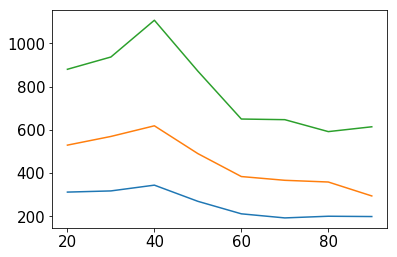

In [204]:
plt.figure(figsize = (15,7))

taille_classe = 10 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(prix_age_df.age), taille_classe)
tranches += int(taille_classe/2) # on décale les tranches d'une demi taille de classe
indices = np.digitize(prix_age_df.age, tranches) # associe chaque solde à son numéro de classe

for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = prix_age_df.loc[indices==ind,"price"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7, # largeur graphique des boxplots
            manage_xticks= False)
plt.xlabel("Age")
plt.ylabel("Montant total des achats")
plt.title("Montant total des achats en fonction de l'âge\n Box plots")

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

# affichage des quartiles
for n_quartile in range(3):
    plt.plot([g["centre_classe"] for g in groupes],
             [g["quartiles"][n_quartile] for g in groupes])


In [807]:
prix_age_mean = corr.groupby(['client_id', 'age'])['price'].mean()
prix_age_mean_0 = corr[corr.categ == 0].groupby(['client_id', 'age'])['price'].mean()
prix_age_mean_1 = corr[corr.categ == 1].groupby(['client_id', 'age'])['price'].mean()
prix_age_mean_2 = corr[corr.categ == 2].groupby(['client_id', 'age'])['price'].mean()
prix_age_mean_df = prix_age_mean.reset_index()
prix_age_mean_0_df = prix_age_mean_0.reset_index()
prix_age_mean_1_df = prix_age_mean_1.reset_index()
prix_age_mean_2_df = prix_age_mean_2.reset_index()

In [808]:
ss.pearsonr(prix_age_mean_df.age, prix_age_mean_df.price)[0]

-0.47852624534251326

In [824]:
X = "age" # qualitative
Y = "price" # quantitative

sous_echantillon_mean = prix_age_mean_df # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('Eta² : ', round(eta_squared(sous_echantillon_mean[X],sous_echantillon_mean[Y]), 3))

Eta² :  0.659


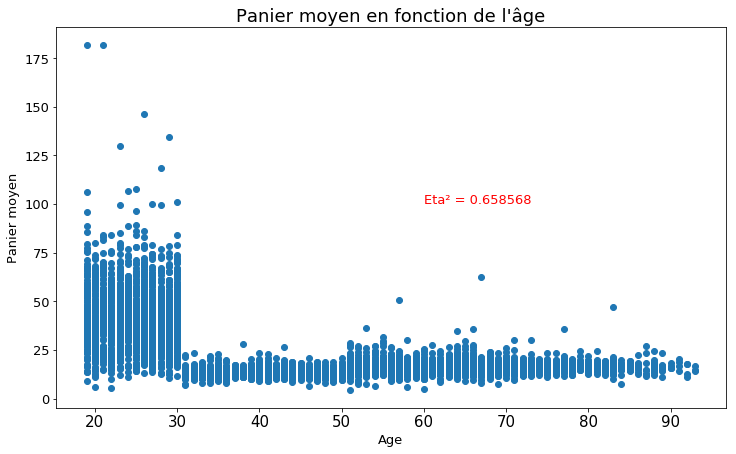

In [825]:
plt.figure(figsize = (12, 7))
plt.scatter(prix_age_mean_df.age, prix_age_mean_df.price)

plt.yticks(size=13)
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Panier moyen', fontsize = 13)

plt.title("Panier moyen en fonction de l'âge")
plt.text(60, 100, 'Eta² = %f' % (eta_squared(sous_echantillon_mean[X],sous_echantillon_mean[Y])), color = 'r', fontsize=13, rotation=0)

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Panier moyen en fonction de l'âge")

In [826]:
X = "age" # qualitative
Y = "price" # quantitative

sous_echantillon_mean_0 = prix_age_mean_0_df # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('Eta² : ', round(eta_squared(sous_echantillon_mean_0[X],sous_echantillon_mean_0[Y]), 3))

Eta² :  0.012


In [827]:
X = "age" # qualitative
Y = "price" # quantitative

sous_echantillon_mean_1 = prix_age_mean_1_df # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('Eta² : ', round(eta_squared(sous_echantillon_mean_1[X],sous_echantillon_mean_1[Y]), 3))

Eta² :  0.008


In [828]:
X = "age" # qualitative
Y = "price" # quantitative

sous_echantillon_mean_2 = prix_age_mean_2_df # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('Eta² : ', round(eta_squared(sous_echantillon_mean_2[X],sous_echantillon_mean_2[Y]), 3))

Eta² :  0.041


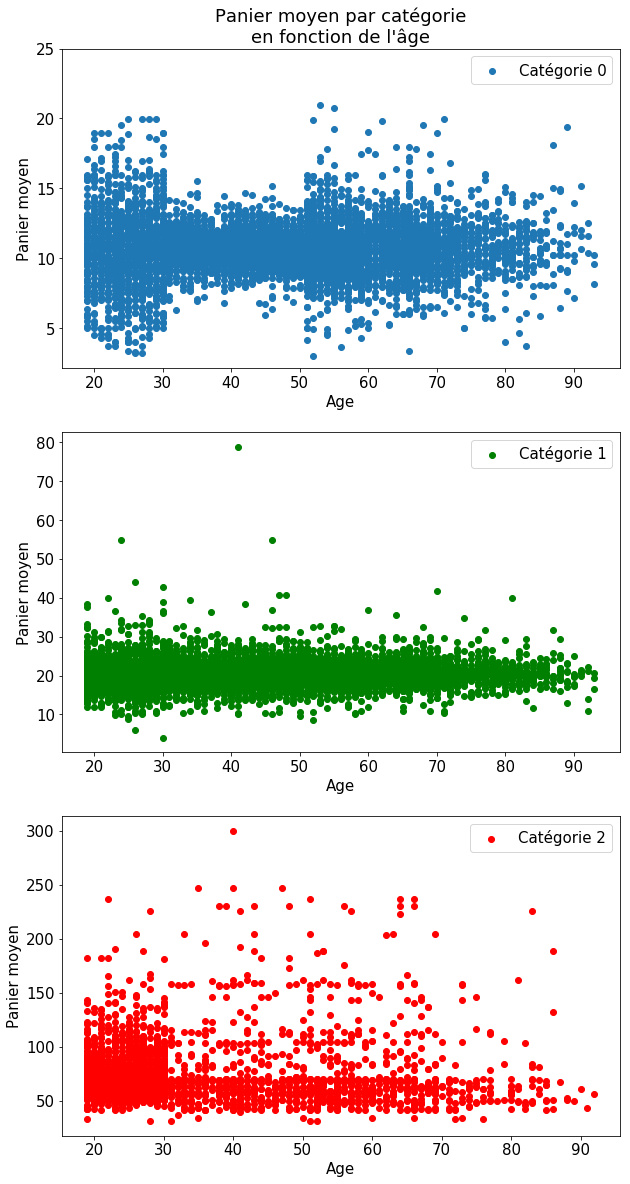

In [815]:
plt.figure(figsize=(10, 20))

plt.subplot(311)
plt.scatter(prix_age_mean_0_df.age, prix_age_mean_0_df.price, label='Catégorie 0')
plt.xlabel("Age")
plt.ylabel("Panier moyen")
plt.yticks([5, 10, 15, 20, 25])
plt.legend(loc=1)

plt.title("Panier moyen par catégorie\nen fonction de l'âge")

plt.subplot(312)
plt.scatter(prix_age_mean_1_df.age, prix_age_mean_1_df.price, label='Catégorie 1', color='g')
plt.xlabel("Age")
plt.ylabel("Panier moyen")
plt.legend(loc=1)

plt.subplot(313)
plt.scatter(prix_age_mean_2_df.age, prix_age_mean_2_df.price, label='Catégorie 2', color='r')
plt.xlabel("Age")
plt.ylabel("Panier moyen")
plt.legend(loc=1)

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Panier moyen par catégorie en fonction de l'âge")

In [214]:
# X2 = prix_age_above_30.index
# Y2 = prix_age_above_30

# slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# plt.scatter(X, Y, label = 'Original data')
# plt.plot(X2, intercept + slope*X2, color = 'r', label = 'Regression')

# plt.xticks([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010], size=12)
# plt.yticks(size=13)
# plt.xlabel('Age de naissance', fontsize = 13)
# plt.ylabel('Montant total des achats', fontsize = 13)

# plt.legend()

# plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\2e regression lineaire 1")

In [144]:
# Forte corrélation entre le montant total des achats et l'âge de naissance des clients, lorsque l'on discrétise l'intervalle
# birth en 2 : en dessous et au dessus de 1980

### Taille des paniers

In [145]:
corr.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40


In [146]:
nbre_articles = corr.groupby(['session_id']).id_prod.value_counts().unstack().sum(axis=1)
nbre_articles.head()

session_id
s_1        1.0
s_10       1.0
s_100      2.0
s_1000     4.0
s_10000    3.0
dtype: float64

In [147]:
nbre_articles.min(), nbre_articles.max()

(1.0, 14.0)

In [148]:
nbre_articles.astype(int)

session_id
s_1         1
s_10        1
s_100       2
s_1000      4
s_10000     3
s_100000    1
s_100003    3
s_100004    1
s_100005    1
s_100007    1
s_100008    1
s_10001     3
s_100011    1
s_100013    1
s_100014    1
s_100015    1
s_100016    1
s_100017    1
s_100018    1
s_10002     1
s_100020    5
s_100021    2
s_100022    1
s_100024    4
s_100025    4
s_100026    3
s_100027    1
s_100029    6
s_10003     1
s_100030    1
           ..
s_99959     1
s_99962     1
s_99964     2
s_99966     2
s_99967     1
s_99969     1
s_9997      1
s_99970     5
s_99971     1
s_99973     1
s_99975     1
s_99977     1
s_99979     2
s_9998      1
s_99980     4
s_99981     1
s_99982     1
s_99983     1
s_99985     2
s_99986     1
s_99989     1
s_9999      3
s_99991     1
s_99992     1
s_99993     1
s_99994     3
s_99995     1
s_99996     4
s_99997     1
s_99998     3
Length: 153607, dtype: int32

([<matplotlib.axis.XTick at 0x2422f721d68>,
 <a list of 15 Text xticklabel objects>)

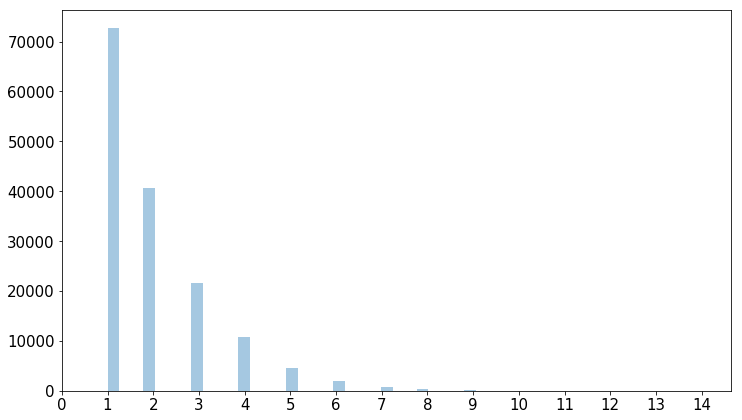

In [149]:
plt.figure(figsize=(12,7))
sns.distplot(nbre_articles, kde=False)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [150]:
# Beaucoup de petits paniers

In [151]:
nbre_articles.mean()

1.9934247788186736

In [152]:
# Panier moyen de 2 articles

In [153]:
corr.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40


In [154]:
nbre_articles_0 = corr[corr.categ==0].groupby(['session_id']).id_prod.value_counts().unstack().sum(axis=1)
nbre_articles_1 = corr[corr.categ==1].groupby(['session_id']).id_prod.value_counts().unstack().sum(axis=1)
nbre_articles_2 = corr[corr.categ==2].groupby(['session_id']).id_prod.value_counts().unstack().sum(axis=1)

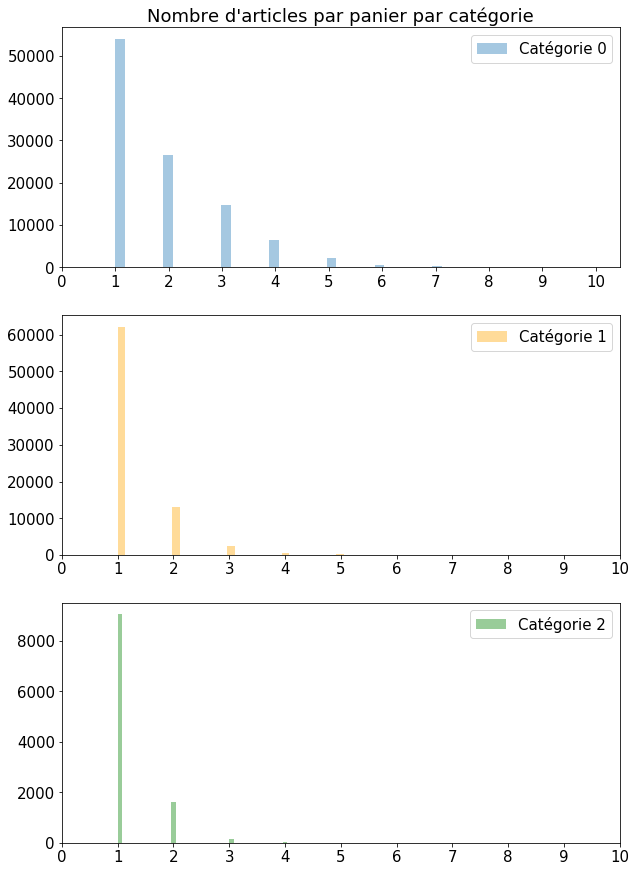

In [155]:
plt.figure(figsize=(10,15))

plt.subplot(311)
sns.distplot(nbre_articles_0, kde=False, label='Catégorie 0')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title("Nombre d'articles par panier par catégorie")

plt.legend()

plt.subplot(312)
sns.distplot(nbre_articles_1, kde=False, color='orange', label='Catégorie 1')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.legend()

plt.subplot(313)
sns.distplot(nbre_articles_2, kde=False, color='green', label='Catégorie 2')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.legend()

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Nombre d'articles par panier par catégorie")

In [156]:
# Intéressant de voir que plus la catégorie augmente, plus le nombre d'articles par panier se réduit
# logique, étant donné que plus la catégorie augmente, plus le prix moyen augmente

### Ventes en fonction de l'âge

In [222]:
panier_age = corr.groupby(['session_id', 'age']).id_prod.value_counts().unstack().sum(axis=1)
panier_age_0 = corr[corr.categ==0].groupby(['session_id', 'age']).id_prod.value_counts().unstack().sum(axis=1)
panier_age_1 = corr[corr.categ==1].groupby(['session_id', 'age']).id_prod.value_counts().unstack().sum(axis=1)
panier_age_2 = corr[corr.categ==2].groupby(['session_id', 'age']).id_prod.value_counts().unstack().sum(axis=1)

In [223]:
panier_age_df = panier_age.reset_index()
panier_age_df_0 = panier_age_0.reset_index()
panier_age_df_1 = panier_age_1.reset_index()
panier_age_df_2 = panier_age_2.reset_index()

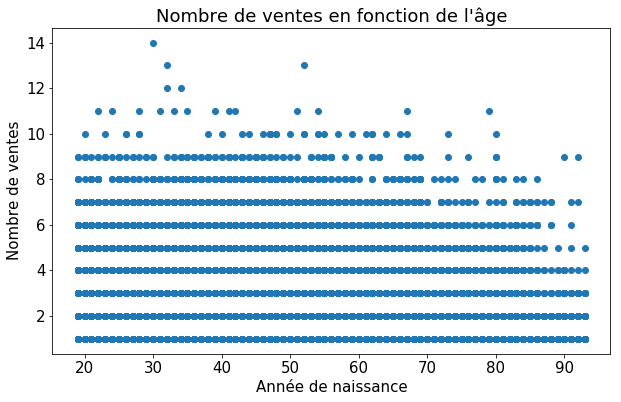

In [231]:
plt.figure(figsize=(10, 6))
plt.scatter(panier_age_df.age, panier_age_df[0])
plt.xlabel('Année de naissance')
plt.ylabel("Nombre de ventes")
plt.title("Nombre de ventes en fonction de l'âge")

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Nombre de ventes en fonction de l'âge")

In [159]:
# En dessous de 30 ans, panier composé d'en moyenne 2 articles 
# Entre 30 et 50 ans, panier composé d'en moyenne 2,5 articles
# Au delà de 50 ans, panier composé d'en moyenne 1,5 articles

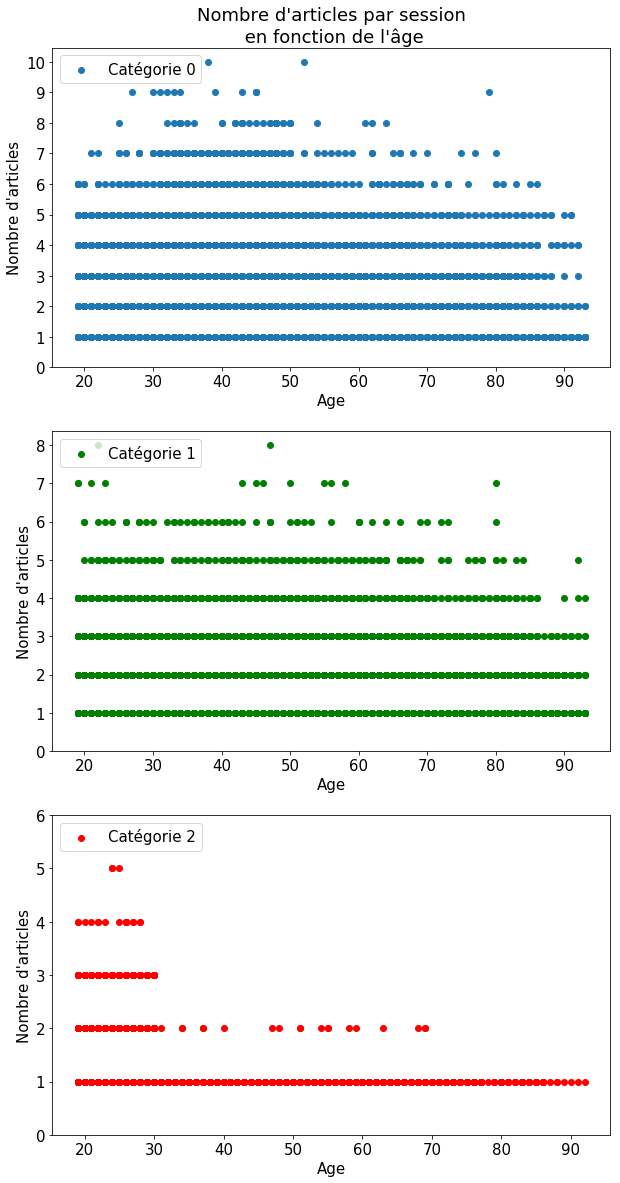

In [261]:
plt.figure(figsize=(10, 20))

plt.subplot(311)
plt.scatter(panier_age_df_0.age, panier_age_df_0[0], label='Catégorie 0')
plt.xlabel("Age")
plt.ylabel("Nombre d'articles")
plt.yticks(range(11))
plt.legend(loc=2)

plt.title("Nombre d'articles par session\n en fonction de l'âge")

plt.subplot(312)
plt.scatter(panier_age_df_1.age, panier_age_df_1[0], label='Catégorie 1', color='g')
plt.xlabel("Age")
plt.ylabel("Nombre d'articles")
plt.yticks(range(9))
plt.legend(loc=2)

plt.subplot(313)
plt.scatter(panier_age_df_2.age, panier_age_df_2[0], label='Catégorie 2', color='r')
plt.xlabel("Age")
plt.ylabel("Nombre d'articles")
plt.yticks(range(7))
plt.legend(loc=2)

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Nombre d'articles par session en fonction de l'âge")

In [ ]:
# 

## Fréquence d'achat en fonction de l'âge

In [168]:
corr.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40


In [169]:
corr['month'] = corr.date.dt.month

C:\Users\adric\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [170]:
corr.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age,month
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55,3
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38,7
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45,1
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35,3
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40,9


In [171]:
month_age = corr.groupby('birth').month.value_counts().unstack()
month_age.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
birth,,,,,,,,,,,,
1929,12,11,3,6,7,6,10,5,13,2,4,7
1930,9,13,8,14,1,15,6,11,8,4,10,16
1931,4,9,12,7,8,8,2,9,5,6,10,4
1932,9,15,17,16,6,13,14,12,9,18,22,8
1933,13,29,10,6,17,14,8,22,15,12,9,8


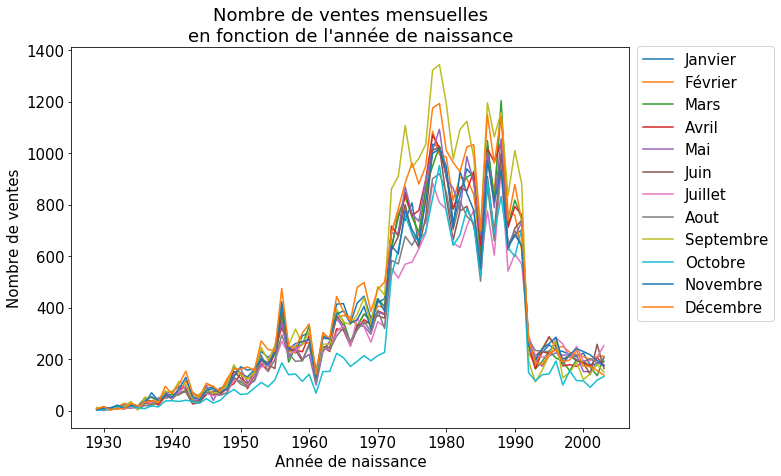

In [172]:
plt.figure(figsize = (10, 7))
plt.plot(month_age[1].index, month_age[1], label='Janvier')
plt.plot(month_age[2].index, month_age[2], label='Février')
plt.plot(month_age[3].index, month_age[3], label='Mars')
plt.plot(month_age[4].index, month_age[4], label='Avril')
plt.plot(month_age[5].index, month_age[5], label='Mai')
plt.plot(month_age[6].index, month_age[6], label='Juin')
plt.plot(month_age[7].index, month_age[7], label='Juillet')
plt.plot(month_age[8].index, month_age[8], label='Aout')
plt.plot(month_age[9].index, month_age[9], label='Septembre')
plt.plot(month_age[10].index, month_age[10], label='Octobre')
plt.plot(month_age[11].index, month_age[11], label='Novembre')
plt.plot(month_age[12].index, month_age[12], label='Décembre')

plt.title("Nombre de ventes mensuelles\nen fonction de l'année de naissance")
plt.xlabel('Année de naissance')
plt.ylabel('Nombre de ventes')
plt.legend(bbox_to_anchor=(1, 1.022), fontsize=15)

## Sexe et catégories des produits

In [173]:
sex_categ = corr.groupby('sex').categ.value_counts().unstack()

In [174]:
sex_categ.sum(axis=1)[0]

159210

Text(0.5, 1.0, "Nombre d'achats par genre")

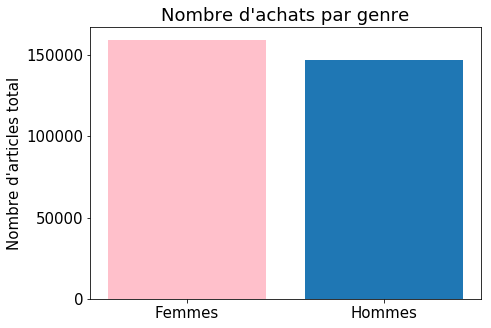

In [175]:
plt.figure(figsize=(7,5))

plt.bar(['Femmes'], sex_categ.sum(axis=1)[0], color = 'pink')
plt.bar(['Hommes'], sex_categ.sum(axis=1)[1])
plt.yticks([0, 50000, 100000, 150000])
plt.ylabel("Nombre d'articles total")
plt.title("Nombre d'achats par genre")

Text(0.5, 1.0, "Nombre d'achats par catégorie et par genre")

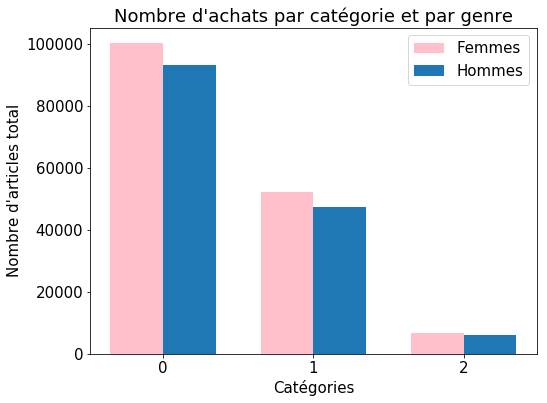

In [176]:
barwidth = 0.35

plt.figure(figsize=(8,6))
plt.bar(sex_categ.columns, sex_categ.loc['f'], color = 'pink', label = 'Femmes', width = barwidth)
plt.bar(sex_categ.columns + barwidth, sex_categ.loc['m'], label = 'Hommes', width = barwidth)
plt.legend()
plt.xticks(sex_categ.columns + barwidth / 2, labels = ['0', '1', '2'])
plt.xlabel('Catégories')
plt.ylabel("Nombre d'articles total")
plt.title("Nombre d'achats par catégorie et par genre")

In [177]:
sex_categ.loc['f']

categ
0    100221
1     52359
2      6630
Name: f, dtype: int64

In [178]:
sex_categ.loc['m']

categ
0    93282
1    47507
2     6205
Name: m, dtype: int64

In [179]:
sex_categ.loc['f'][2] / sex_categ.loc['m'][2]

1.0684931506849316

In [180]:
(corr.sex.value_counts()['f'] - corr.sex.value_counts()['m']) / corr.sex.value_counts()['m'] * 100

8.310543287481122

In [181]:
# Les femmes consomment plus que les hommes, et ce, dans toutes les catégories

In [183]:
# Inégalité dans les montants des paniers
# L'indice de Gini confirme cette inégalité, par une valeur qui est glablement moyenne

In [783]:
cont_norm = pd.crosstab(corr.sex, corr.categ, normalize=True)
cont_norm

categ,0,1,2
sex,,,
f,0.327301,0.170994,0.021652
m,0.304640,0.155148,0.020264


In [762]:
cont = pd.crosstab(corr.sex, corr.categ)
cont

categ,0,1,2
sex,,,
f,100221,52359,6630
m,93282,47507,6205


In [743]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ['foo']
ty.columns = ['foo']
n = len(corr)
indep = tx.dot(ty.T) / n

indep

,0,1,2
f,100611.398381,51925.075636,6673.525983
m,92891.601619,47940.924364,6161.474017


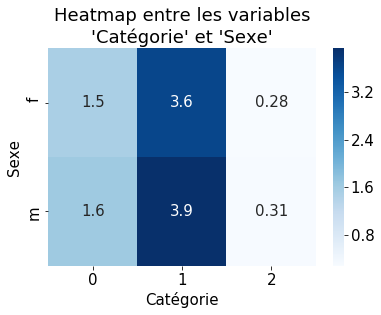

In [795]:
mesure = (cont-indep)**2 / indep
sum_m = mesure.sum().sum()
sns.heatmap(mesure, annot=True, cmap="Blues")
plt.xlabel("Catégorie")
plt.ylabel("Sexe")
plt.title("Heatmap entre les variables\n'Catégorie' et 'Sexe'")

plt.savefig("D:\\OpenClassrooms\\Projet 4\\Plots P4\\Heatmap entre Catégorie et Sexe")

In [793]:
sum_m

11.300690641556582

In [184]:
av = data.groupby(data.date.dt.month).categ.value_counts().unstack().sum().sum()
av

336713

In [185]:
ap = categ_by_month.sum().sum()
ap

346328

In [186]:
(ap - av) / av * 100

2.855547602854657

In [187]:
cat_0 = data[data.categ == 0].price.sum()

In [188]:
cat_0 / data.price.sum()

0.3846619054332122

In [189]:
ca_month = data.groupby(data.date.dt.month).price.sum()

Text(0.5, 1.0, 'CA mensuel')

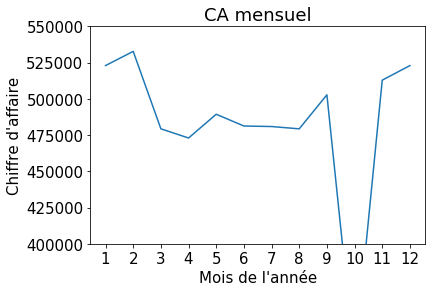

In [190]:
plt.plot(ca_month.index, ca_month)
plt.xticks(ca_month.index)
plt.ylim(400000, 550000)
plt.xlabel("Mois de l'année")
plt.ylabel("Chiffre d'affaire")
plt.title('CA mensuel')

In [191]:
ca_month = data.groupby(data.date.dt.month).price.sum()

In [192]:
mean_ca_month = ca_month.loc[[9, 11, 12]].mean()
ca_month.loc[10] = mean_ca_month
ca_month

date
1     522955.310000
2     532740.880000
3     479312.030000
4     472980.720000
5     489367.950000
6     481257.940000
7     480898.660000
8     479305.190000
9     502771.280000
10    512866.376667
11    512890.170000
12    522937.680000
Name: price, dtype: float64

Text(0.5, 1.0, 'CA mensuel corrigé')

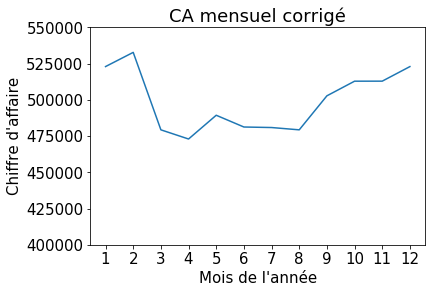

In [193]:
plt.plot(ca_month.index, ca_month)
plt.xticks(ca_month.index)
plt.ylim(400000, 550000)
plt.xlabel("Mois de l'année")
plt.ylabel("Chiffre d'affaire")
plt.title('CA mensuel corrigé')

In [800]:
data.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40
